In [1]:
import pickle
import numpy as np
from symbolic_regression.utils.visualization import plot_results
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
data = pickle.load(open("data_20260207_172158.pkl", "rb"))['kwargs']
results_df, features, equations = data['df'], data['features'], data['equations']

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
# results_df = results_df.drop('GP', level='method', axis=1)

# import pandas as pd
# data = pickle.load(open("abs.pkl", "rb"))['kwargs']

# results_df_abs, features_abs, equations_abs = data['df'], data['features'], data['equations']
# results_df_abs = results_df_abs.drop('GP', level='method', axis=1)
# results_df_abs.columns = pd.MultiIndex.from_tuples(
#     [(col[0], col[1] + "_abs", col[2]) for col in results_df_abs.columns],
#     names=results_df.columns.names
# )
# results_df = pd.concat([results_df, results_df_abs], axis=1).sort_index(axis=1)

In [4]:
results_df.head(2)  

dataset     542_pollution                                                \
method             GPSHAP                                         GPCMI   
metric    training_losses validation_losses test_losses training_losses   
run epoch                                                                 
0   10           0.468660          0.607776    0.580448        0.222401   
    20           0.162069          0.290070    0.238942        0.195211   

dataset                                                                    \
method                                          RFGPCMI                     
metric    validation_losses test_losses training_losses validation_losses   
run epoch                                                                   
0   10             0.260089    0.301201        0.148356          0.180744   
    20             0.253660    0.299088        0.153731          0.202616   

dataset                                ...         CCN                  \
method                           GPPI  ...       GPCMI         RFGPCMI   
metric    test_losses training_losses  ... test_losses training_losses   
run epoch                              ...                               
0   10       0.249888        0.170564  ...    0.207271        0.195264   
    20       0.255192        0.158431  ...    0.207271        0.195960   

dataset                                                                    \
method                                             GPPI                     
metric    validation_losses test_losses training_losses validation_losses   
run epoch                                                                   
0   10             0.194826    0.207271        0.195264          0.194826   
    20             0.193853    0.208428        0.193459          0.200129   

dataset                                                              
method                             GP                                
metric    test_losses training_losses validation_losses test_losses  
run epoch                                                            
0   10       0.207271        0.195264          0.194826    0.207271  
    20       0.207271        0.195199          0.203318    0.207271  

[2 rows x 45 columns]

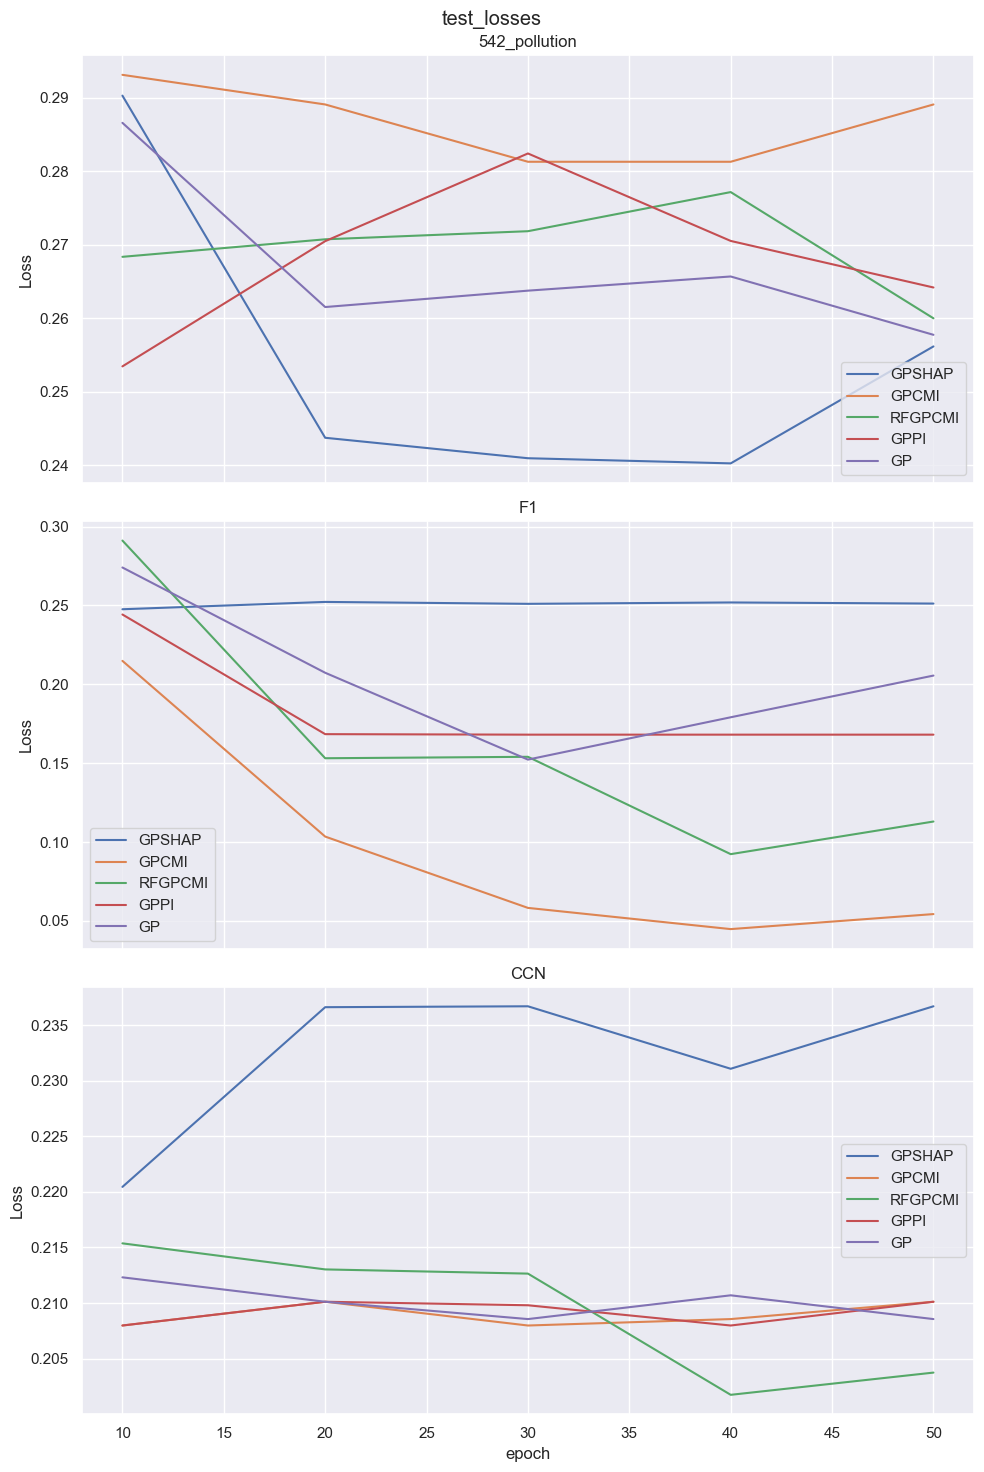

In [10]:
fig, axes = plot_results(
    results_df.groupby(level='epoch').median(), 
    nrows=3, 
    # ncols=2, 
    group_level="dataset",
    value_level="metric",
    value_key="test_losses",
    plotting_function=lambda data, ax: sns.lineplot(data=data, ax=ax, dashes=None)
)

fig.figure.set_size_inches(10, 15)
fig.tight_layout(w_pad=0.5)

# axes[2].set_ylim(0, 0.01)
# fig.suptitle("GPSHAP", y=1.01)
plt.show()

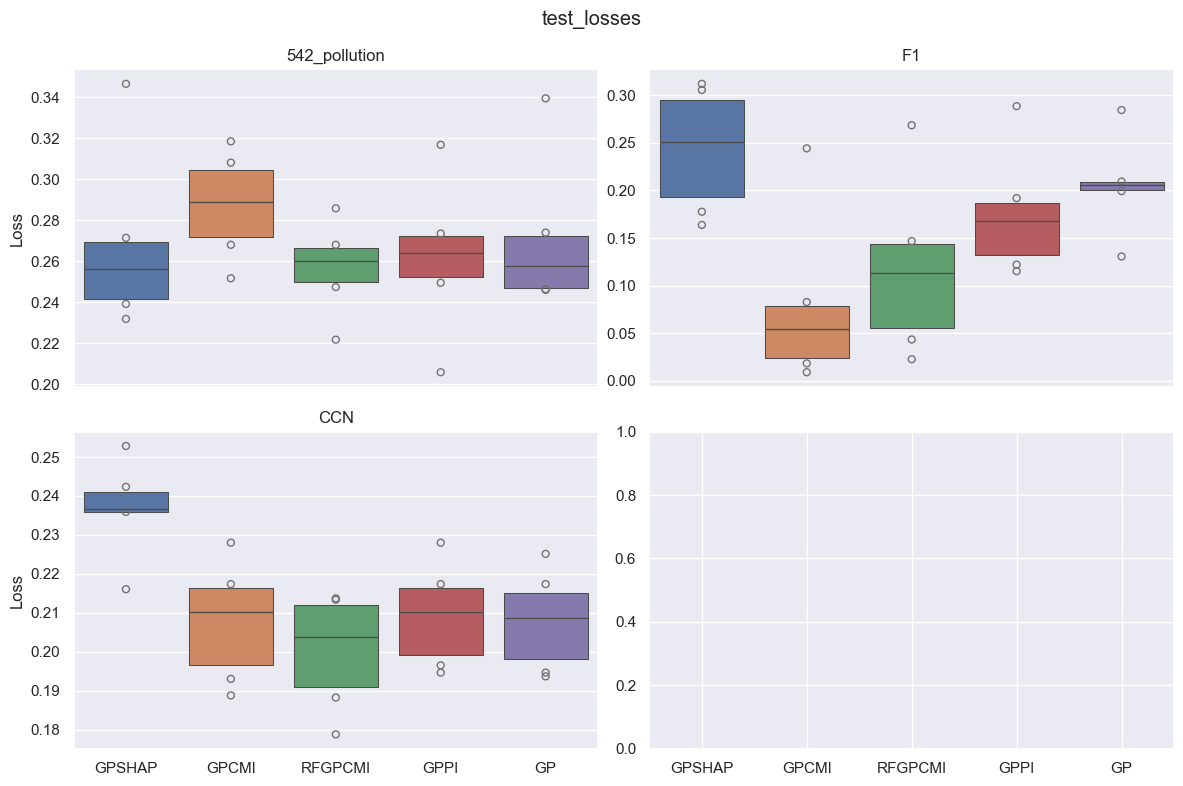

In [11]:
fig, axes = plot_results(
    results_df.groupby(level='run').last(), 
    nrows=2, 
    # ncols=3, 
    # group_level="model",
    # value_level="metric", 
    value_key="test_losses"
    # value_key="validation_losses",
    # value_key="training_losses"
)

fig.figure.set_size_inches(12, 8)
# # fig.figure.set_size_inches(4, 6)
fig.tight_layout(w_pad=0.5)
# fig.suptitle("Test Loss for Different Methods", y=1.04)
# fig.supylabel("Test Loss", x=-.02)
# fig.supxlabel("Methods", y=-.05)

# axes[0].set_ylim(0, 0.02)
# axes[1].set_ylim(.0, 0.3)
# axes[3].set_ylim(.0, 0.4)
plt.show()

In [12]:
print('Mean Unique Features per Method')
print('-------------------------------\n')

for dataset_name in features.keys():
    print(f"{dataset_name} features:")

    for method in features[dataset_name].keys():
        list_of_lists = features[dataset_name][method]

        if isinstance(list_of_lists[0][0], str):
            a = [len(alist) for alist in list_of_lists]

        else:
            a = [len(set([item for sublist in alist for item in sublist])) for alist in list_of_lists]
        
        print(f"{method}: {np.mean(a):.2f} ± {np.std(a):.2f}")
    print()
            

Mean Unique Features per Method
-------------------------------

542_pollution features:
GPSHAP: 4.00 ± 0.00
GPCMI: 0.83 ± 0.90
RFGPCMI: 2.33 ± 1.37
GPPI: 4.00 ± 0.00
GP: 15.00 ± 0.00

F1 features:
GPSHAP: 6.00 ± 0.00
GPCMI: 3.17 ± 0.37
RFGPCMI: 4.17 ± 0.90
GPPI: 2.00 ± 0.00
GP: 53.00 ± 0.00

CCN features:
GPSHAP: 7.00 ± 0.00
GPCMI: 4.17 ± 2.73
RFGPCMI: 7.17 ± 1.86
GPPI: 1.00 ± 0.00
GP: 122.00 ± 0.00

